In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties

In [2]:
def generate_dates(birth_date, current_date, num_years=90, weeks_per_year=52.1429):
    dates = []
    for year in range(num_years):
        for week in range(int(weeks_per_year)):
            week_date = birth_date + timedelta(weeks=year * weeks_per_year + week)
            dates.append((year, week, week_date <= current_date))
    return dates

def draw_life_calendar(birth_date_str, font_path='../fonts/Balsamiq_Sans/BalsamiqSans-Regular.ttf'):
    birth_date = datetime.strptime(birth_date_str, '%Y-%m-%d')
    current_date = datetime.now()
    dates = generate_dates(birth_date, current_date)

    fig, ax = plt.subplots(figsize=(10, 15))
    for year, week, is_past in dates:
        color = 'black' if is_past else 'white'
        # Creating a rectangle with rounded corners
        box = FancyBboxPatch((week, year), 0.9, 0.9, boxstyle="round,pad=-0.1,rounding_size=0.25",
                             edgecolor='gray', facecolor=color)
        ax.add_patch(box)

    ax.set_xlim(-0.5, 51.5+0.9)  # Adjusted to align with the grid
    ax.set_ylim(-0.5, 89.5+0.9)  # Adjusted to align with the grid
    ax.set_aspect('equal')

    props = FontProperties(fname=font_path, size=16)
    ax.set_title('Life Calendar', pad=20, fontproperties=props)
    
    # to make x lable at the top
    ax.xaxis.set_label_position('top')
    props = FontProperties(fname=font_path, size=12)
    ax.set_xlabel('Week of the Year', fontproperties=props)
    
    props = FontProperties(fname=font_path, size=12)
    ax.set_ylabel('Age', fontsize=12, fontproperties=props)

    # Setting ticks for years and weeks
    props = FontProperties(fname=font_path, size=10)
    ax.set_xticks(range(0, 52, 5))
    ax.set_xticklabels(range(0, 52, 5), fontproperties=props)
    ax.set_yticks(range(0, 91, 5))
    ax.set_yticklabels(range(0, 91, 5), fontproperties=props)
    
    # To make xticks at the top
    ax.xaxis.tick_top()

    ax.invert_yaxis()  # Invert the y-axis so that age increases as you go down
    
    plt.gcf().set_dpi(600)
    plt.show()

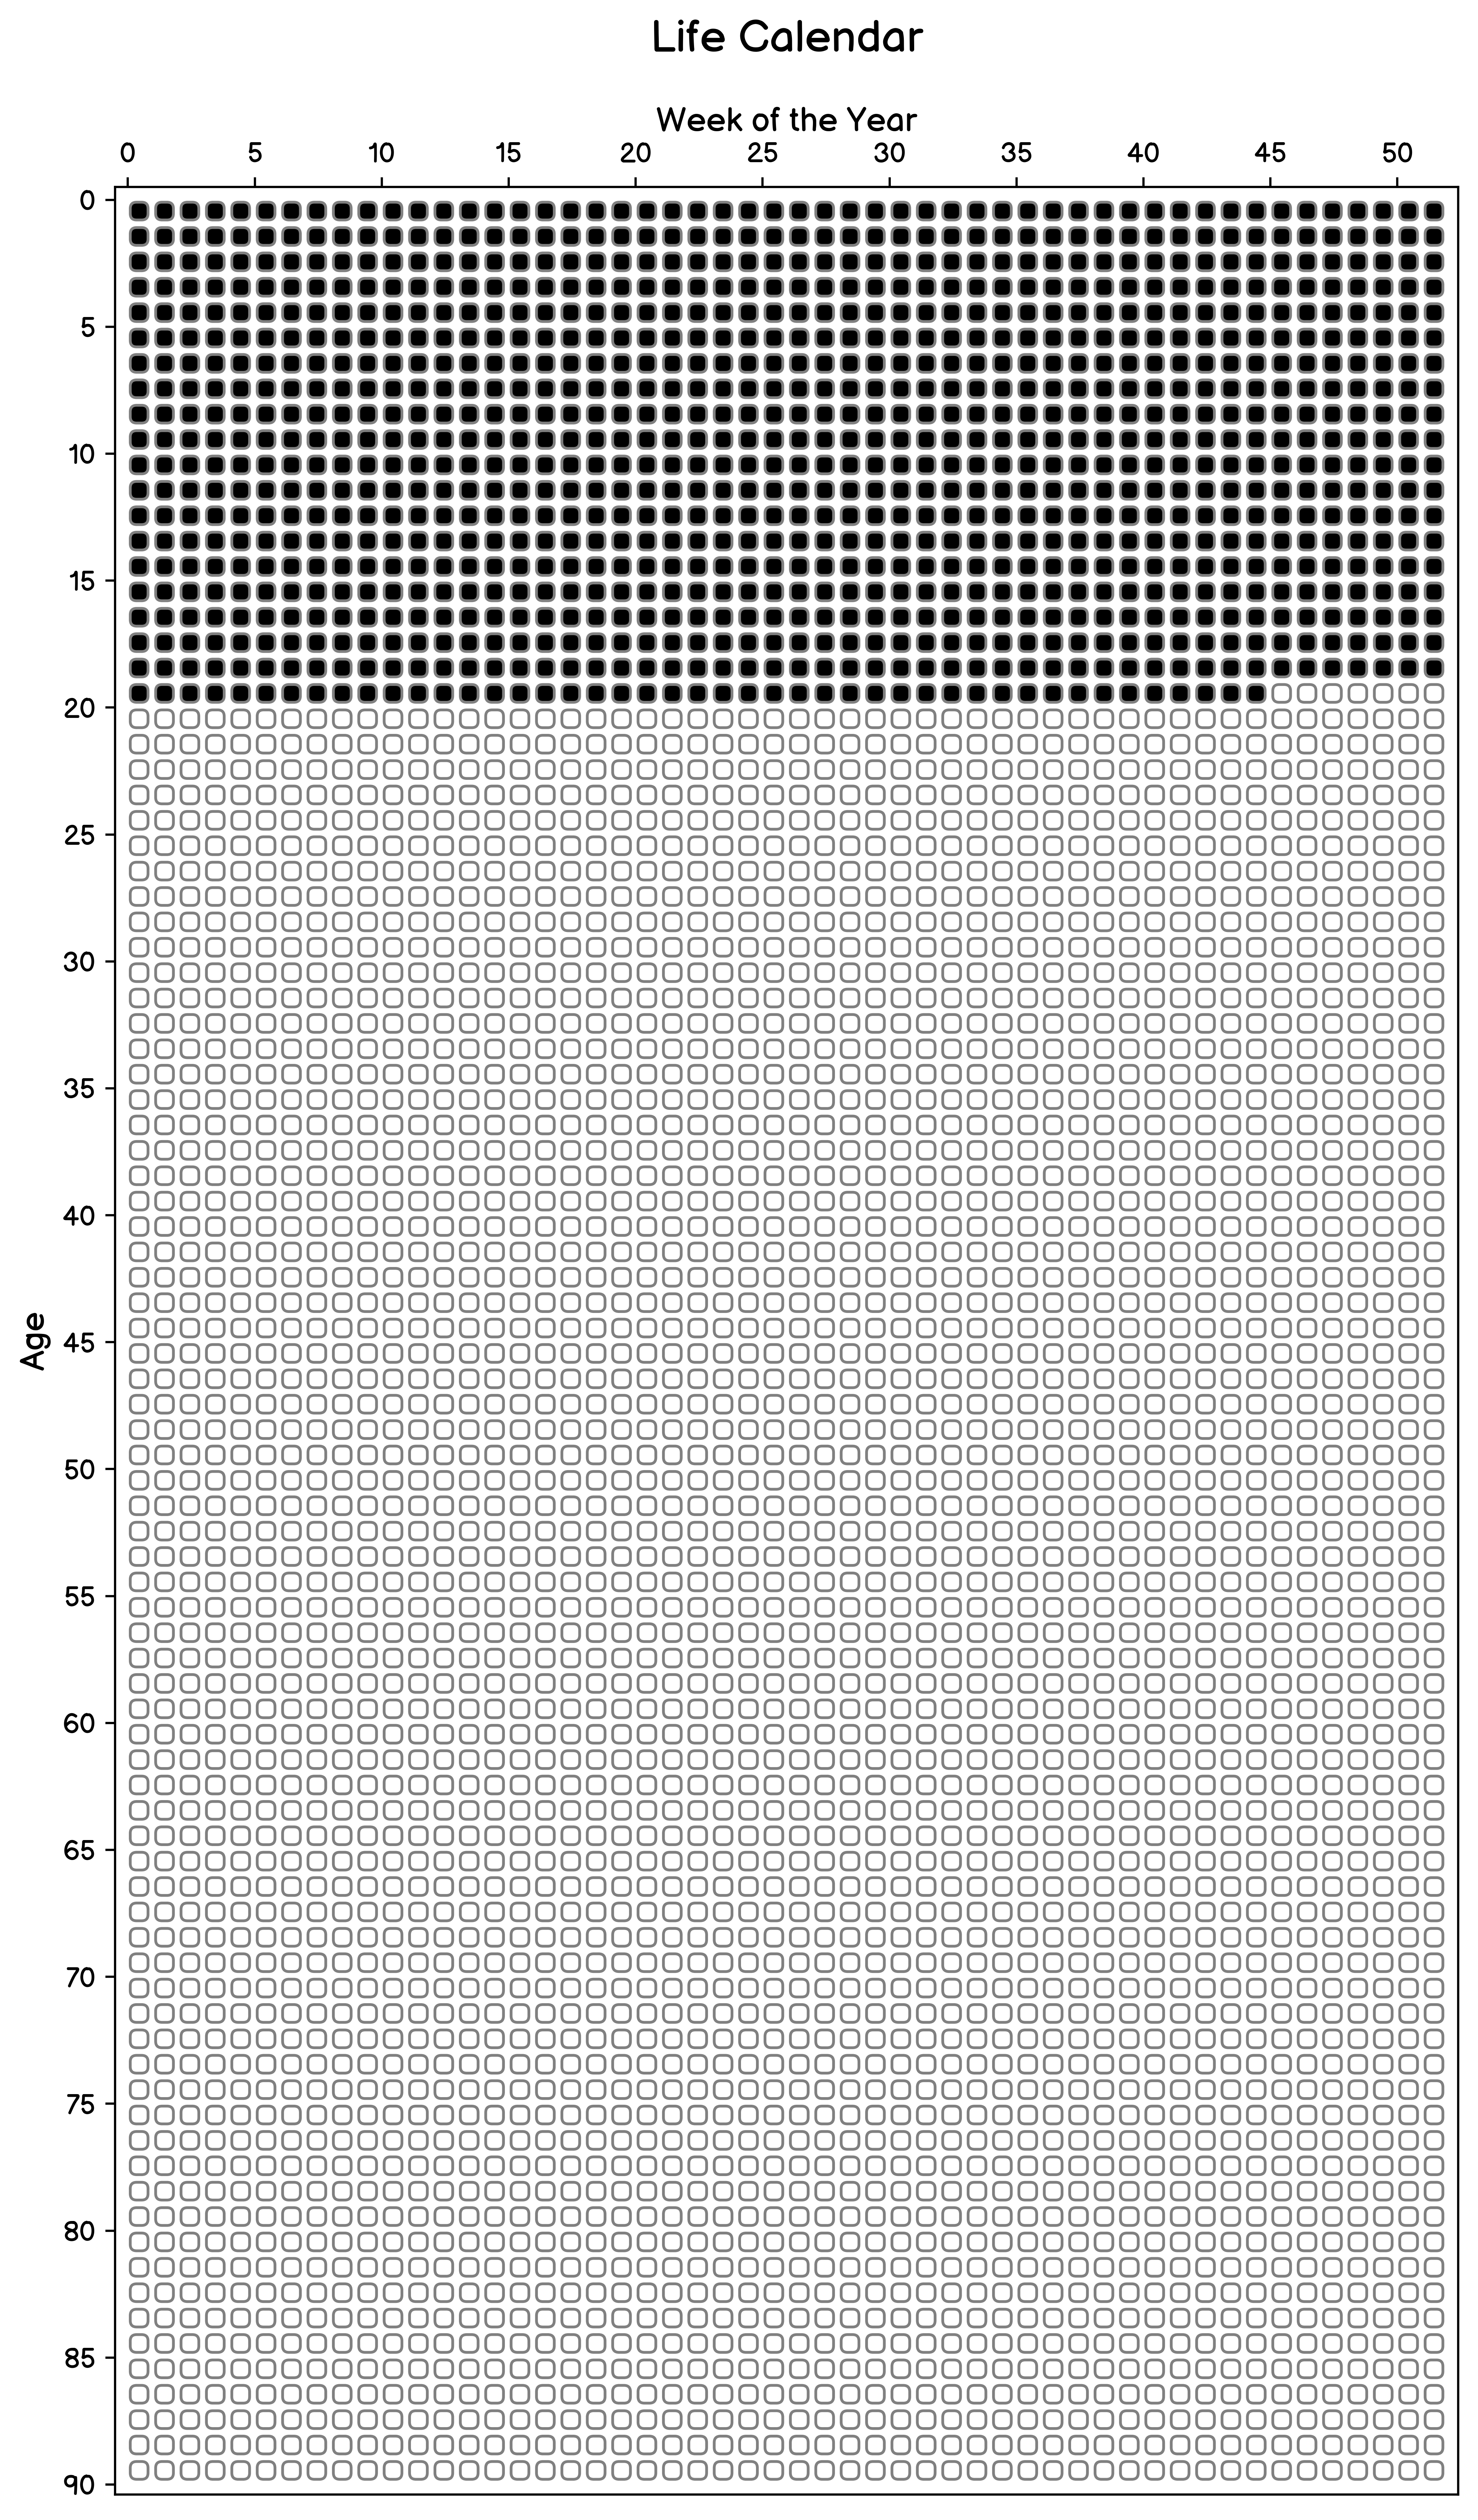

In [3]:
# Example usage
draw_life_calendar('2004-09-03')